In [1]:
!pip install web3
import json
from web3 import Web3
import pandas as pd
import numpy as np
import networkx as nx 
from tqdm.notebook import tqdm
import math

In [2]:
# StackOverflow ♥
# we need to filter out all those paths that ping-pongs during the path 
def findPaths(G,u,n):
    if n==0:
        return [[u]]
    paths = [[u]+path for neighbor in G.neighbors(u) for path in findPaths(G,neighbor,n-1)]
    return paths

def find_cycles(G,u,n):
    paths = findPaths(G,u,n)
    return [tuple(path) for path in paths if (path[-1] == u) and sum(x ==u for x in path) == 2]

def find_cycles_not_PingPong(G,u,n):
    paths = findPaths(G,u,n)
    return [tuple(path) for path in paths if (path[-1] == u) and sum(x ==u for x in path) == 2 and sum(prev==next for prev,cur,next in zip([None]+path[:-1], path, path[1:]+[None]))==0] #1) check that the last element is the starting element; 2) check that the starting element is counted just twice in the path; 3) check that previous element of the path is different from the subsequent one

In [14]:
with open(f"endpoints/baseTokens.json") as f:
    info_json = json.load(f)
_baseToken = info_json

chain = "Fantom"
dex = "SushiFTM"
_wEth = _baseToken[chain]
thresholdNumber = 3 #minimum number of pools (=edges)
tokensInvolvedInCycle = 3 #Put 3 for triangular abitrage
showGraphs = True

_userAccount = "0xD59488d45304b2C7DC593f491F7206073602854B"

In [4]:
with open(f"pools/Pools{dex}.json") as f:
    info_json = json.load(f)
pools = list(info_json)

allTokens = np.unique(np.array(list(map(lambda x:x["tokens"],pools))))
poolMatrix = {}
for i in tqdm(range(0,len(allTokens))):
    obj = {}
    for j in range(0,len(pools)):
        if(allTokens[i] in pools[j]["tokens"])==True:
            otherIndex = 1 if pools[j]["tokens"].index(allTokens[i])==0 else 0
            obj[pools[j]["tokens"][otherIndex]]=pools[j]["indirizzoPool"]
        # else:
        #     obj.append(0)
    poolMatrix[allTokens[i]]=obj

  0%|          | 0/814 [00:00<?, ?it/s]

In [5]:
dataframe = pd.DataFrame(poolMatrix)
dataframe = dataframe.fillna(0)
dataframe

,0x0026296407a0ebA938409575F84059ca603d33DC,0x00471A2268BE28A2c8EEF11A39E69427CeC01744,0x0098017a01528ED652C2B6B8E36e0532d1E4f047,0x01129405C8B88B52A4926C7B0673A12aB0Ba85Be,0x023F9222A68A162eda61D491e2490B093A3c5f31,0x02E7031ba348C979CC959254470eFBC4c52E1d0c,0x02dB5f2C369D7BABaF774BC44Cd4cE5904D150DB,0x035D7da8Fe989e9FB75DD878384fD1f69238115B,0x03943C3ef00d92e130185CeBC0bcc435Def2cC94,0x039b9252D2819969eEdD25830c4Daa5f1E25dfC8,...,0xf874beC42DC9C4afEE502B0641E5dcEC4E37ac6C,0xf8E0b4390E91517A6bbf257d980C34081aCB3984,0xf8Fc059dAfDCe4EF2EdFc72cbBAF410d7531E610,0xfA4Ceb3b84D7e6B3529acbbafe17c7F046255169,0xfAfF096571fdb051b9048A5DC516E6FB95C4564d,0xfD1153a2BE2A04fF0Ae9e95A25544d58aF97F548,0xfE8F12ec5DE2c561A4f1b396dc28F2ca187c5841,0xfE96c1DA2DcEE9a6D1e6E496D5efaAfE95C73d83,0xfF0f7deBAB9325320a0246609d190579Bbf0D9fd,0xfF4DfE6B789F506FE9196b153b42628E9D21ce2F
0x21be370D5312f44cB42ce377BC9b8a0cEF1A4C83,0x5ce170f3029670B2Cc7620559F443A81A2405EbF,0x16D5eBB7178999D029FfaED07546FDCcEA72089E,0x3019fe031d35f07226f98a773C6DA8AF6496c145,0x0f423F68C136fFfe7A8669Ad7BB8C7cD1e5F5582,0x84EF0dc4467E517F7Fa2001141545E89ca073368,0xF04C54b1a38d0789525e1BFF472f13e5dc199bdd,0xd1e8ee179CEAd10edeeBb927efb0D4070A02323a,0x7685F77F0Fd0686d59b5C7bD215713A5f9B74Fed,0,0,...,0x2688E630A282a2473AcFfB2720dc5644E452F1d7,0x32318D51932725c19179c50B3866e8484C2361b6,0xC30FA09417F149892Ff86eF92a051c0bC2244c7C,0xf8554Afa8156B2aE0de883C1708e6B774D6AD98d,0xbac01DEF8EF7221ecb320690bB0B8ACf955fC173,0x14125cc05bCEbE824CcD56416d1DFAC008C568CB,0xc2fB00d1Bf3517b4Da477d3Cb59FeF1818eF5183,0x0424BEE17A81c12bDCfFA4405589444E9324cFe0,0x35223c0eD8B20d15498b6456619C182485EAbD9A,0x27885d8c15ABc049A558daC37542014c13f3aE72
0xAd84341756Bf337f5a0164515b1f6F993D194E1f,0x69571c0AD27af3d46eEbE4749C0aa6dC4a362520,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0x049d68029688eAbF473097a2fC38ef61633A3C7A,0,0,0,0,0,0,0,0,0xADc61938C4A17827828dD13DcE20ea270589cE4a,0,...,0,0,0,0,0,0,0,0,0,0
0x61Ed1C66239d29Cc93C8597c6167159e8F69a823,0,0,0,0,0,0,0,0,0,0xc8e3DF3e6Fe20842868B39AdCE6F9BF862C59149,...,0,0,0,0,0,0,0,0,0,0
0x8D11eC38a3EB5E956B052f67Da8Bdc9bef8Abf3E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x823813F4577FE0575f30c750B8C2c0074A6fA73e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0xC4e42D31bF543bf3F87B1760a3eD4e218C753Ee1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0xF8305Fee999Eb1c1cD67Ab0BA58D4e0787aF4B42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0x4d27aaEDADB901Db0a3C68eBe9A877756582353B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


  0%|          | 0/814 [00:00<?, ?it/s]

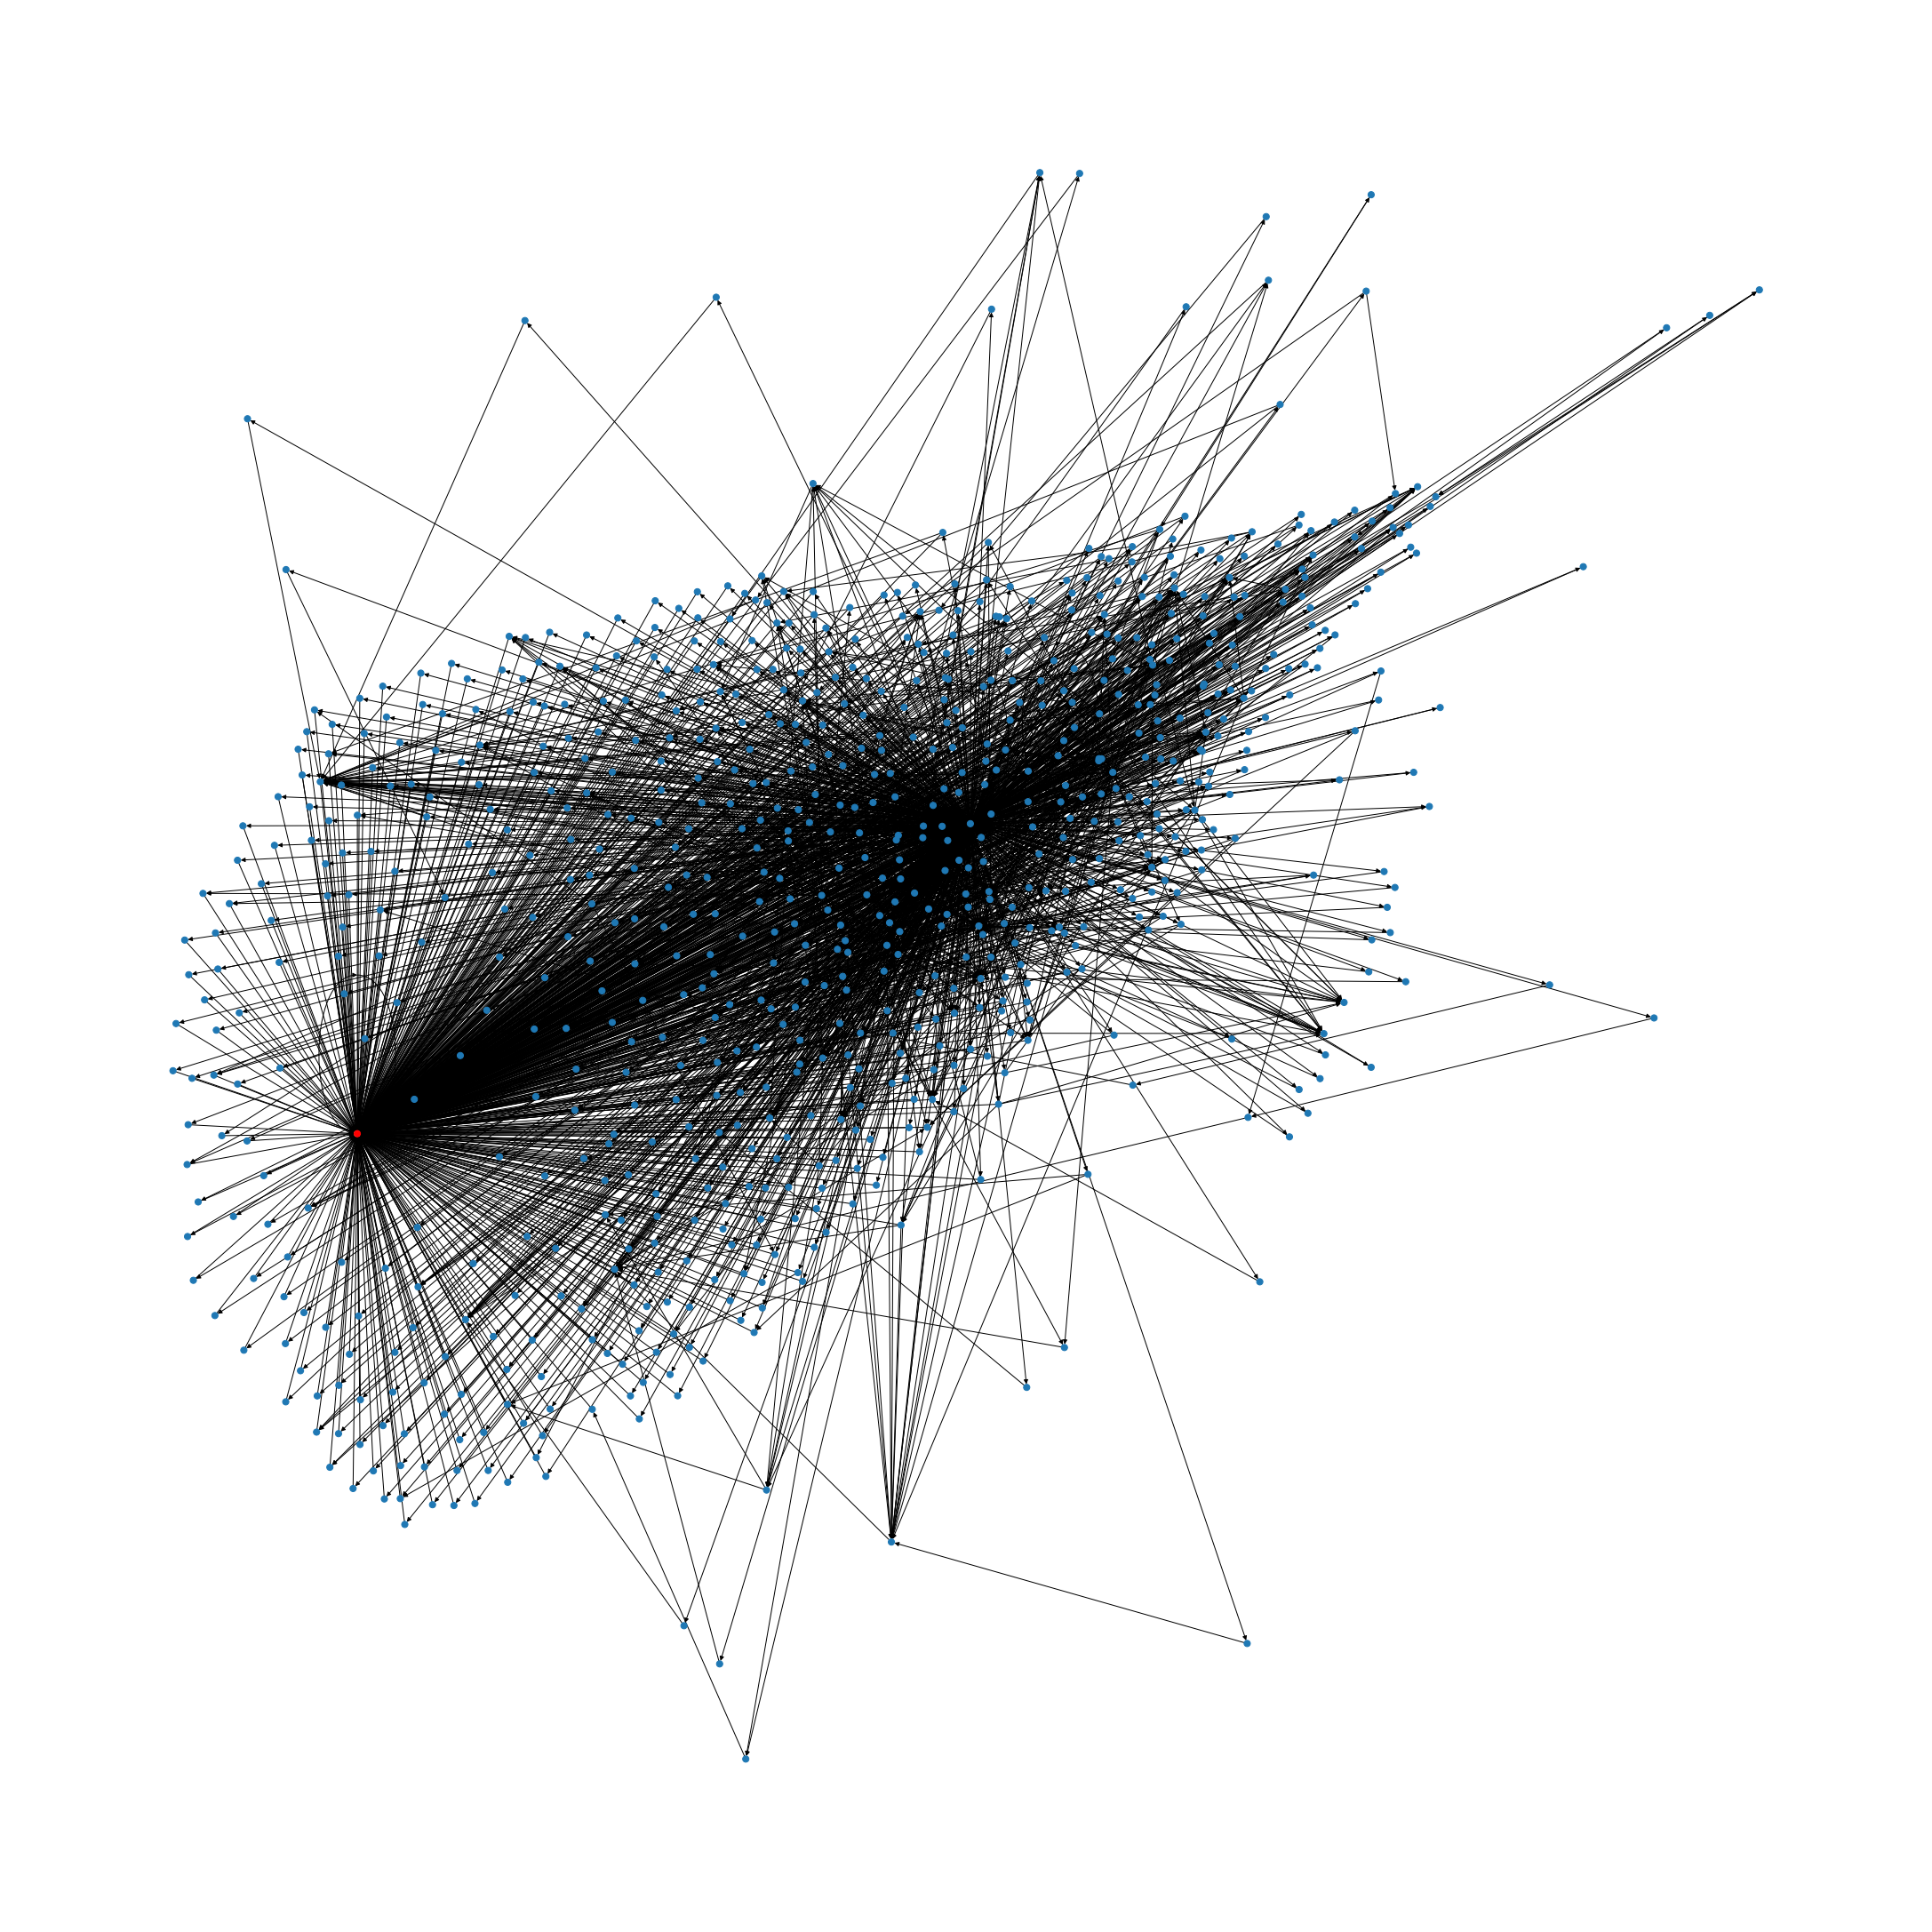

In [15]:
arrayMatrix = dataframe.values
h, w = arrayMatrix.shape
G = nx.DiGraph()
for i in tqdm(range(h)): 
 for j in range(w):
   if arrayMatrix[i][j]!=0: 
     G.add_edge(i,j) 
import matplotlib.pyplot as plt 
plt.figure(5,figsize=(30,30))
ftmIndex = list(dataframe.columns).index(_wEth) #we point out node associated to FTM
color_map = ['red' if node == ftmIndex else '#1f78b4' for node in G]
if(showGraphs):
  nx.draw( G, node_size =50, node_color = color_map) 
  plt.show()

In [7]:
#We reduce the matrix to those tokens which have at least two different pools, eliminating recursively rows and columns
#In this way we eliminate nodes on the boundary and nodes that have very few links (=pools) with other tokens
filteredDataframe = dataframe
previousShape = (0,0)
while(filteredDataframe.shape!=previousShape):
    print(filteredDataframe.shape,previousShape)
    previousShape = filteredDataframe.shape
    data = (filteredDataframe[(filteredDataframe != 0).sum(1) >= thresholdNumber])
    data = data[data.index]#pd.DataFrame(poolMatrixReduced).loc[pd.DataFrame(poolMatrixReduced).columns]
    filteredDataframe = data

print(filteredDataframe.shape)
# filteredDataframe.to_json(f"Pools{dex}Filtered.json")

(814, 814) (0, 0)
(63, 63) (814, 814)
(61, 61) (63, 63)
(61, 61)


In [8]:
filteredDataframe

,0x21be370D5312f44cB42ce377BC9b8a0cEF1A4C83,0xAd84341756Bf337f5a0164515b1f6F993D194E1f,0x049d68029688eAbF473097a2fC38ef61633A3C7A,0x8D11eC38a3EB5E956B052f67Da8Bdc9bef8Abf3E,0x658b0c7613e890EE50B8C4BC6A3f41ef411208aD,0x2b9C073Ec670b70F417bbaf3BbB052AA563A0a23,0x078EEF5A2fb533e1a4d487ef64b27DF113d12C32,0x74b23882a30290451A17c44f4F05243b6b58C76d,0xf16e81dce15B08F326220742020379B855B87DF9,0x6a07A792ab2965C72a5B8088d3a069A7aC3a993B,...,0x5Cc61A78F164885776AA610fb0FE1257df78E59B,0x2241FaBdf45C54cA330c34c783b114E6BcAae7E7,0x2055f39e549fdd42516B637dA80Db7D6776A238c,0x3038BaC0775F31C413c87446B0d34A2D20B3AD17,0xf61cCdE1D4bB76CeD1dAa9D4c429cCA83022B08B,0xcfF748A0D8fddf5bE3FbC47F3a1C7630E1Cff2Cd,0xF8bbAB5e7D7FB441c7A9F1E1De00a27b558CFB7E,0x16d8Adf3D5b93AA3a9EF2Daa9521Ced713838387,0x468003B688943977e6130F4F68F23aad939a1040,0xDDc0385169797937066bBd8EF409b5B3c0dFEB52
0x21be370D5312f44cB42ce377BC9b8a0cEF1A4C83,0,0x8623836F527350Ec50691479674Df0cD7773810c,0xd019dd7C760c6431797d6ed170bFFb8FAee11F99,0xd32F2EB49E91aA160946f3538564118388d6246a,0xbeddBAe6e24314a3336eF5E706A9a039395d6CB7,0x2c49250b1a9f7193B548210907A9249154C177A8,0x5b4926fD3d9A628a8Dc1510E2A45048F1BE6D366,0x3d0BD54c48C2C433ea6fed609Cc3d5Fb7A77622B,0x84311ECC54D7553378c067282940b0fdfb913675,0x27884C7647DeB61c9F2b9202D1141BB84661756b,...,0xe22d1953a21B6c93c4d129A0697a78aA87BD9831,0x0FC9C821E72D698270A4864E6F30Bb8a39BBb3bB,0xb825e6a1C3105e4fEae1e128eE88615695Bb2518,0xdE32E788b2038b7a81923023C81d9373C3778972,0x2f64270715BF7C33Af1aE0842c29bd75F1882102,0x029C97F8019f01136536176bffFA60686E8478d8,0xDBe25B464ae286c02b7112ab40543fD6b532D8E3,0x0Da56B55Ac848C5E292ab197275714879C8DebB5,0xAB3F048f9a169D969Ea9fb2Fdf74Bc48107Bd573,0x7f9D00827EF8d71FdF7d87F430CdF8A54e21E3a5
0xAd84341756Bf337f5a0164515b1f6F993D194E1f,0x8623836F527350Ec50691479674Df0cD7773810c,0,0x8A6eBa896d750D8C04E815B74B3744d97BD0DAaD,0x673C97c8040a615444D3B56f3F17075c30fA3f0a,0x0103715fD20A3f2E11fD7b3E646A5F6F6703d245,0x31053Fa999891D45CB375C95af85fD1471b58E77,0x28ef7Bf74E53EC3C198727fF34770a729d40B607,0x1d6101825d3412925e56C058559E6BFCC4661f1c,0x206D807c14709Db7c1C7500395178d9f72DA7160,0,...,0,0,0xA2C91Ea80caBC35c38296eB940A7A07818011CE0,0x776aF8560545E72076f7d33Bbf2B912E3E249540,0,0x4c5B3C34430F328005F892CB6388c2fE39c4E894,0,0,0,0
0x049d68029688eAbF473097a2fC38ef61633A3C7A,0xd019dd7C760c6431797d6ed170bFFb8FAee11F99,0x8A6eBa896d750D8C04E815B74B3744d97BD0DAaD,0,0xD0154BE15563c100A90C9B4499f54E0F2f3098c6,0,0,0,0,0x93698ad941359a3C771e15CFcE345Abe0191e035,0,...,0,0,0,0,0,0,0,0,0,0
0x8D11eC38a3EB5E956B052f67Da8Bdc9bef8Abf3E,0xd32F2EB49E91aA160946f3538564118388d6246a,0x673C97c8040a615444D3B56f3F17075c30fA3f0a,0xD0154BE15563c100A90C9B4499f54E0F2f3098c6,0,0xe74385DAe8fE6ebd0d55300300Fe2e298324f95f,0x15c15C6a6E9ceaA33eAb7D51553680De93a81F36,0x947d2919d541b6cFA75A85da27960BD16Dc22114,0x71C8BceEcE3dAf9E27741D2Cc1F03170f862555f,0x50300cDFb7EB963a4dCe30b17af8554b5d37188D,0,...,0x240f161d87523142Ea2d027CECD111be499b68ee,0,0xEB8656dd0c6EADFE67AE73055FDE7969B02d9F9F,0xa3d5e76B5b45ae3808e2632E30380801601a90D4,0,0,0,0,0,0
0x658b0c7613e890EE50B8C4BC6A3f41ef411208aD,0xbeddBAe6e24314a3336eF5E706A9a039395d6CB7,0x0103715fD20A3f2E11fD7b3E646A5F6F6703d245,0,0xe74385DAe8fE6ebd0d55300300Fe2e298324f95f,0,0x971D768852dD06549917120bb65E815fadE5ac6e,0,0,0,0,...,0,0,0,0x3775826EEc5EBEaF2a7715720920111A95932210,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0xcfF748A0D8fddf5bE3FbC47F3a1C7630E1Cff2Cd,0x029C97F8019f01136536176bffFA60686E8478d8,0x4c5B3C34430F328005F892CB6388c2fE39c4E894,0,0,0,0,0,0,0,0,...,0,0,0,0x5F8b11b633ddad01fA4e2862699C8047bE950341,0,0,0,0,0,0
0xF8bbAB5e7D7FB441c7A9F1E1De00a27b558CFB7E,0xDBe25B464ae286c02b7112ab40543fD6b532D8E3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0x16d8Adf3D5b93AA3a9EF2Daa9521Ced713838387,0x0Da56B55Ac848C5E292ab197275714879C8DebB5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0x468003B688943977e6130F4F68F23aad939a1040,0xAB3F048f9a169D969Ea9fb2Fdf74Bc48107Bd573,0,0,0,0,0,

In [9]:
arrayMatrix = filteredDataframe.values
h, w = arrayMatrix.shape
G = nx.DiGraph()
for i in tqdm(range(h)): 
 for j in range(w):
  #  if arrayMatrix[i][j] !=0 and arrayMatrix[i][j] !="0x00": 
#    if "0x" in str(arrayMatrix[i][j]): 
   if arrayMatrix[i][j]!=0: 
      G.add_edge(i,j) 
import matplotlib.pyplot as plt 
plt.figure(5,figsize=(5,5))
ftmIndex = list(filteredDataframe.columns).index(_wEth) #we point out node associated to FTM
color_map = ['red' if node == ftmIndex else '#1f78b4' for node in G]
if(showGraphs):
   nx.draw( G,node_size=50, node_color=color_map ) 
   plt.show()

  0%|          | 0/61 [00:00<?, ?it/s]

<Figure size 360x360 with 0 Axes>

In [10]:
#We define all the cycles that are present in such a matrix: we don't need to do it everytime, it's enough doing it just one time and save the path involving FTM as first input token
#Once we collected the paths, we will ask the information of the pools involved and we will apply recursively (for each path found) the "theorem" of the paper regarding existence of exploitable arbitrages   
# https://42papers.co/pdf/2105.02784.pdf

ftmIndex = list(filteredDataframe.columns).index(_wEth) #for future work, getting confidence with flashloans, starting node may be any "flashloanable" token, not only FTM
cycles = find_cycles_not_PingPong(G,ftmIndex,tokensInvolvedInCycle) #we extract every cycle (=ordered tuple of nodes) starting from the InputToken and with a length equal to "tokensInvolvedInCycle"

tokenPaths = []
poolsPaths = [] 

#For each cycle, we translate the ordered tuple of nodes in a ordered tuple of tokens and in a ordered tuple of pools (with length n-1) 
for j in tqdm(range(0,len(cycles))):
    currentCycle = cycles[j]
    cycleTokens=[]
    poolsInvolved = []
    for i in range(0,len(currentCycle)):
        cycleTokens.append(filteredDataframe.columns[currentCycle[i]])
        if(i>0):
            poolsInvolved.append(filteredDataframe[filteredDataframe.columns[currentCycle[i-1]]][filteredDataframe.columns[currentCycle[i]]])
    tokenPaths.append(cycleTokens)
    poolsPaths.append(poolsInvolved)

  0%|          | 0/394 [00:00<?, ?it/s]

In [11]:
# Now we remove all those paths in which a same pool is repeated several times in the same path
#Moreover, we check if there is any issue in the arbitrage path by simulating a multiswap, in order to discard all those paths involving scam tokens

with open("abis/Lifeguard.json") as f:
    info_json = json.load(f)
abi = info_json["abi"]

with open("endpoints/deployedAddresses.json") as f:
    info_json = json.load(f)
contract = info_json

with open("endpoints/indirizziDex.json") as f:
    info_json = json.load(f)
dexAddresses = info_json

with open("endpoints/chainsEndpoint.json") as f:
    info_json = json.load(f)
chainsEndpoint = info_json

url = chainsEndpoint[chain]
# url = "http://localhost:7545"
_router = dexAddresses[dex]["router"]
indirizzoContrattoCustom = contract[chain]#Mainnet 
testingQuantity = math.floor(0.0001*(math.pow(10,18)))

w3 = Web3(Web3.HTTPProvider(url))
contrattoLifeguard = w3.eth.contract(address=indirizzoContrattoCustom, abi=abi)

finalPoolsPaths = []  # we will apply the "theorem" iterating on this list
finalTokenPaths = []
for i in tqdm(range(0, len(poolsPaths))):
    if(len(set(poolsPaths[i])) == len(poolsPaths[i])):
        goodPath = False
        # try:
        # goodPath = contrattoLifeguard.functions.qualityCheck([tokenPaths[i]],_router).call({ "from": _userAccount, "value": testingQuantity, "gas":5000000 }) if chain=="Celo" else contrattoLifeguard.functions.qualityCheckFTM([tokenPaths[i]],_router).call({ "from": _userAccount, "value": testingQuantity, "gas":5000000 })
        try:
            goodPath = contrattoLifeguard.functions.multipleSwapUniCelo(tokenPaths[i],_router,True).call({ "from": _userAccount, "value": testingQuantity, "gas":5000000 }) if chain=="Celo" else contrattoLifeguard.functions.multipleSwapUni(tokenPaths[i],_router,True).call({ "from": _userAccount, "value": testingQuantity, "gas":5000000 })
        except Exception as e: print(e)
        # except:
        #     goodPath = [False]
        # # print(goodPath)
        if(goodPath):
            finalPoolsPaths.append(poolsPaths[i])
            finalTokenPaths.append(tokenPaths[i])
print(len(finalTokenPaths))
with open(f'monitorUtils/finalPoolsPaths{dex}.json', 'w') as f:
    json.dump(finalPoolsPaths, f)
with open(f'monitorUtils/finalTokenPaths{dex}.json', 'w') as f:
    json.dump(finalTokenPaths, f)
# finalTokenPaths

  0%|          | 0/394 [00:00<?, ?it/s]

execution reverted: UniswapV2: INSUFFICIENT_OUTPUT_AMOUNT
execution reverted: UniswapV2Library: INSUFFICIENT_LIQUIDITY
execution reverted: TransferHelper: TRANSFER_FROM_FAILED
execution reverted: UniswapV2: INSUFFICIENT_OUTPUT_AMOUNT
execution reverted: UniswapV2: INSUFFICIENT_OUTPUT_AMOUNT
execution reverted: UniswapV2: INSUFFICIENT_OUTPUT_AMOUNT
execution reverted: TransferHelper: TRANSFER_FROM_FAILED
execution reverted: TransferHelper: TRANSFER_FROM_FAILED
execution reverted: UniswapV2: INSUFFICIENT_OUTPUT_AMOUNT
execution reverted: TransferHelper: TRANSFER_FROM_FAILED
execution reverted: UniswapV2Library: INSUFFICIENT_LIQUIDITY
execution reverted: UniswapV2Library: INSUFFICIENT_LIQUIDITY
execution reverted: TransferHelper: TRANSFER_FROM_FAILED
execution reverted: UniswapV2: INSUFFICIENT_OUTPUT_AMOUNT
execution reverted: UniswapV2: INSUFFICIENT_OUTPUT_AMOUNT
execution reverted: UniswapV2: INSUFFICIENT_OUTPUT_AMOUNT
execution reverted: UniswapV2: INSUFFICIENT_OUTPUT_AMOUNT
execution 

In [12]:
# finalPools1=filteredDataframe.to_numpy().flatten() 
finalPools1 = np.array(finalPoolsPaths).flatten() #pool addresses we will query on the smart contract (associated to tokens that have links at least with "thresholdNumber" other tokens)
finalPools = np.unique(finalPools1[finalPools1!=0])
with open(f'monitorUtils/snipedPools{dex}.json', 'w') as f:
    json.dump(finalPools.tolist(), f)
# print(len(finalPools))

C:\Users\Fedem\AppData\Local\Temp/ipykernel_8436/2513158550.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  finalPools = np.unique(finalPools1[finalPools1!=0])
